<a href="https://colab.research.google.com/github/AshishShinde03/BritishAirwaysProject/blob/main/British_Airways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import missingno as msno

In [97]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=100'

# create an empty list to store the extracted data
reviews_list = []

for page_num in range(1, 101):
    params = {'page': page_num}
    response = requests.get(url, params=params)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    review_blocks = soup.find_all('div', class_='tc_mobile')

    for block in review_blocks:
        try:
            # Detailed_review = block.find('td', class_='text_content').find_next('td').text.strip()
            Detailed_review = block.find('div', class_='text_content').text.strip()
        except AttributeError:
            Detailed_review = "N/A"
        try:
            type_of_traveler = block.find('td', class_='review-rating-header type_of_traveller').find_next('td').text.strip()
        except AttributeError:
            type_of_traveler = "N/A"
        try:
            cabin_flown = block.find('td', class_='review-rating-header cabin_flown').find_next('td').text.strip()
        except AttributeError:
            cabin_flown = "N/A"
        try: 
            route = block.find('td', class_='review-rating-header route').find_next('td').text.strip()
        except AttributeError:
            route = "N/A" 
        try:
            date_flown = block.find('td', class_='review-rating-header date_flown').find_next('td').text.strip()
        except AttributeError:
            date_flown = "N/A"
        try:
            recommended = block.find('td', class_='review-rating-header recommended').find_next('td').text.strip()
        except AttributeError:
            recommended = "N/A"
        try:
            cabin_staff_service = block.find('td', class_='review-rating-header cabin_staff_service').find_next('td').find_all('span', class_='fill')
            cabin_staff_service_rating = len(cabin_staff_service)
        except AttributeError:
            cabin_staff_service = "N/A"
        try:
            food_and_beverages = block.find('td', class_='review-rating-header food_and_beverages').find_next('td').find_all('span', class_='fill')
            food_and_beverages_rating = len(food_and_beverages)
        except AttributeError:
            food_and_beverages = "N/A"
        try:
            ground_service = block.find('td', class_='review-rating-header ground_service').find_next('td').find_all('span', class_='fill')
            ground_service_rating = len(ground_service)
        except AttributeError:
            ground_service = "N/A"
        try:
            value_for_money = block.find('td', class_='review-rating-header value_for_money').find_next('td').find_all('span', class_='fill')
            value_for_money_rating = len(value_for_money)
        except AttributeError:
            value_for_money = "N/A"
        
        # add the extracted data as a dictionary to the list
        review_dict = {
            'Detailed_review': Detailed_review,
            'Type of traveler': type_of_traveler,
            'Cabin flown': cabin_flown,
            'Route': route,
            'Date flown': date_flown,
            'Recommended': recommended,
            'Cabin Staff Service': cabin_staff_service_rating,
            'Food & Beverages': food_and_beverages_rating,
            'Ground Service': ground_service_rating,
            'Value for Money': value_for_money_rating
        }
        reviews_list.append(review_dict)

# create a dataframe from the list
df = pd.DataFrame(reviews_list)

# export the dataframe to an excel file
df.to_excel('british_airways_reviews.xlsx', index=False)
df.to_csv('british_airways_reviews.csv', index=False)


In [98]:
df

,Detailed_review,Type of traveler,Cabin flown,Route,Date flown,Recommended,Cabin Staff Service,Food & Beverages,Ground Service,Value for Money
0,✅ Trip Verified | Why do you make it so hard? ...,Couple Leisure,Business Class,London to Atlanta,April 2023,no,3,2,2,3
1,✅ Trip Verified | After several delays and ca...,Couple Leisure,Economy Class,London to Copenhagen,April 2023,no,4,1,1,1
2,Not Verified | Literally the worst flight of ...,Couple Leisure,Economy Class,London to Malta,April 2023,no,1,2,1,1
3,✅ Trip Verified | I swore I would never fly B...,Couple Leisure,Economy Class,Belfast to London,April 2023,yes,4,3,4,4
4,✅ Trip Verified | Obviously many airlines hav...,Business,Premium Economy,London to Hong Kong,April 2023,no,2,3,4,3
...,...,...,...,...,...,...,...,...,...,...
3515,YYZ to LHR - July 2012 - I flew overnight in p...,N/A,Premium Economy,N/A,N/A,yes,3,3,3,4
3516,LHR to HAM. Purser addresses all club passenge...,N/A,Business Class,N/A,N/A,yes,5,4,3,3
3517,My son who had worked for British Airways urge...,N/A,Economy Class,N/A,N/A,yes,5,4,3,4
3518,London City-New York JFK via Shannon on A318 b...,N/A,Premium Economy,N/A,N/A,no,3,5,3,1


In [142]:
df = df.rename(columns={'Type of traveler': 'Type_of_traveler', 'Cabin flown': 'Cabin_flown', 'Date flown': 'Date_flown', 'Cabin Staff Service': 'Cabin_Staff_Service', 'Food & Beverages': 'Food_Beverages', 'Ground Service': 'Ground_Service', 'Value for Money': 'Value_for_Money'})

In [143]:
df

,Detailed_review,Type_of_traveler,Cabin_flown,Route,Date_flown,Recommended,Cabin_Staff_Service,Food_Beverages,Ground_Service,Value_for_Money,CSAT
0,✅ Trip Verified | Why do you make it so hard? ...,Couple Leisure,Business Class,London to Atlanta,April 2023,no,3,2,2,3,2.50
1,✅ Trip Verified | After several delays and ca...,Couple Leisure,Economy Class,London to Copenhagen,April 2023,no,4,1,1,1,1.75
2,Not Verified | Literally the worst flight of ...,Couple Leisure,Economy Class,London to Malta,April 2023,no,1,2,1,1,1.25
3,✅ Trip Verified | I swore I would never fly B...,Couple Leisure,Economy Class,Belfast to London,April 2023,yes,4,3,4,4,3.75
4,✅ Trip Verified | Obviously many airlines hav...,Business,Premium Economy,London to Hong Kong,April 2023,no,2,3,4,3,3.00
...,...,...,...,...,...,...,...,...,...,...,...
3515,YYZ to LHR - July 2012 - I flew overnight in p...,NaT,Premium Economy,NaT,NaT,yes,3,3,3,4,3.25
3516,LHR to HAM. Purser addresses all club passenge...,NaT,Business Class,NaT,NaT,yes,5,4,3,3,3.75
3517,My son who had worked for British Airways urge...,NaT,Economy Class,NaT,NaT,yes,5,4,3,4,4.00
3518,London City-New York JFK via Shannon on A318 b...,NaT,Premium Economy,NaT,NaT,no,3,5,3,1,3.00


# Data Cleaning

Handling Missing Values

In [123]:
# replace "N/A" with NaN
df = df.replace('N/A', pd.NaT)

# generate boolean mask for missing values
mask = df.isna()

# count the number of missing values in each column
missing_counts = mask.sum()

# calculate the percentage of missing values in each column
missing_percentages = 100 * missing_counts / len(df)

# print the results
print(f"Number of missing values:\n{missing_counts}\n")
print(f"Percentage of missing values:\n{missing_percentages}\n")

Number of missing values:
Detailed_review          0
Type of traveler       770
Cabin flown              2
Route                  774
Date flown             778
Recommended              0
Cabin Staff Service      0
Food & Beverages         0
Ground Service           0
Value for Money          0
CSAT                     0
dtype: int64

Percentage of missing values:
Detailed_review         0.000000
Type of traveler       21.875000
Cabin flown             0.056818
Route                  21.988636
Date flown             22.102273
Recommended             0.000000
Cabin Staff Service     0.000000
Food & Beverages        0.000000
Ground Service          0.000000
Value for Money         0.000000
CSAT                    0.000000
dtype: float64



<Axes: >

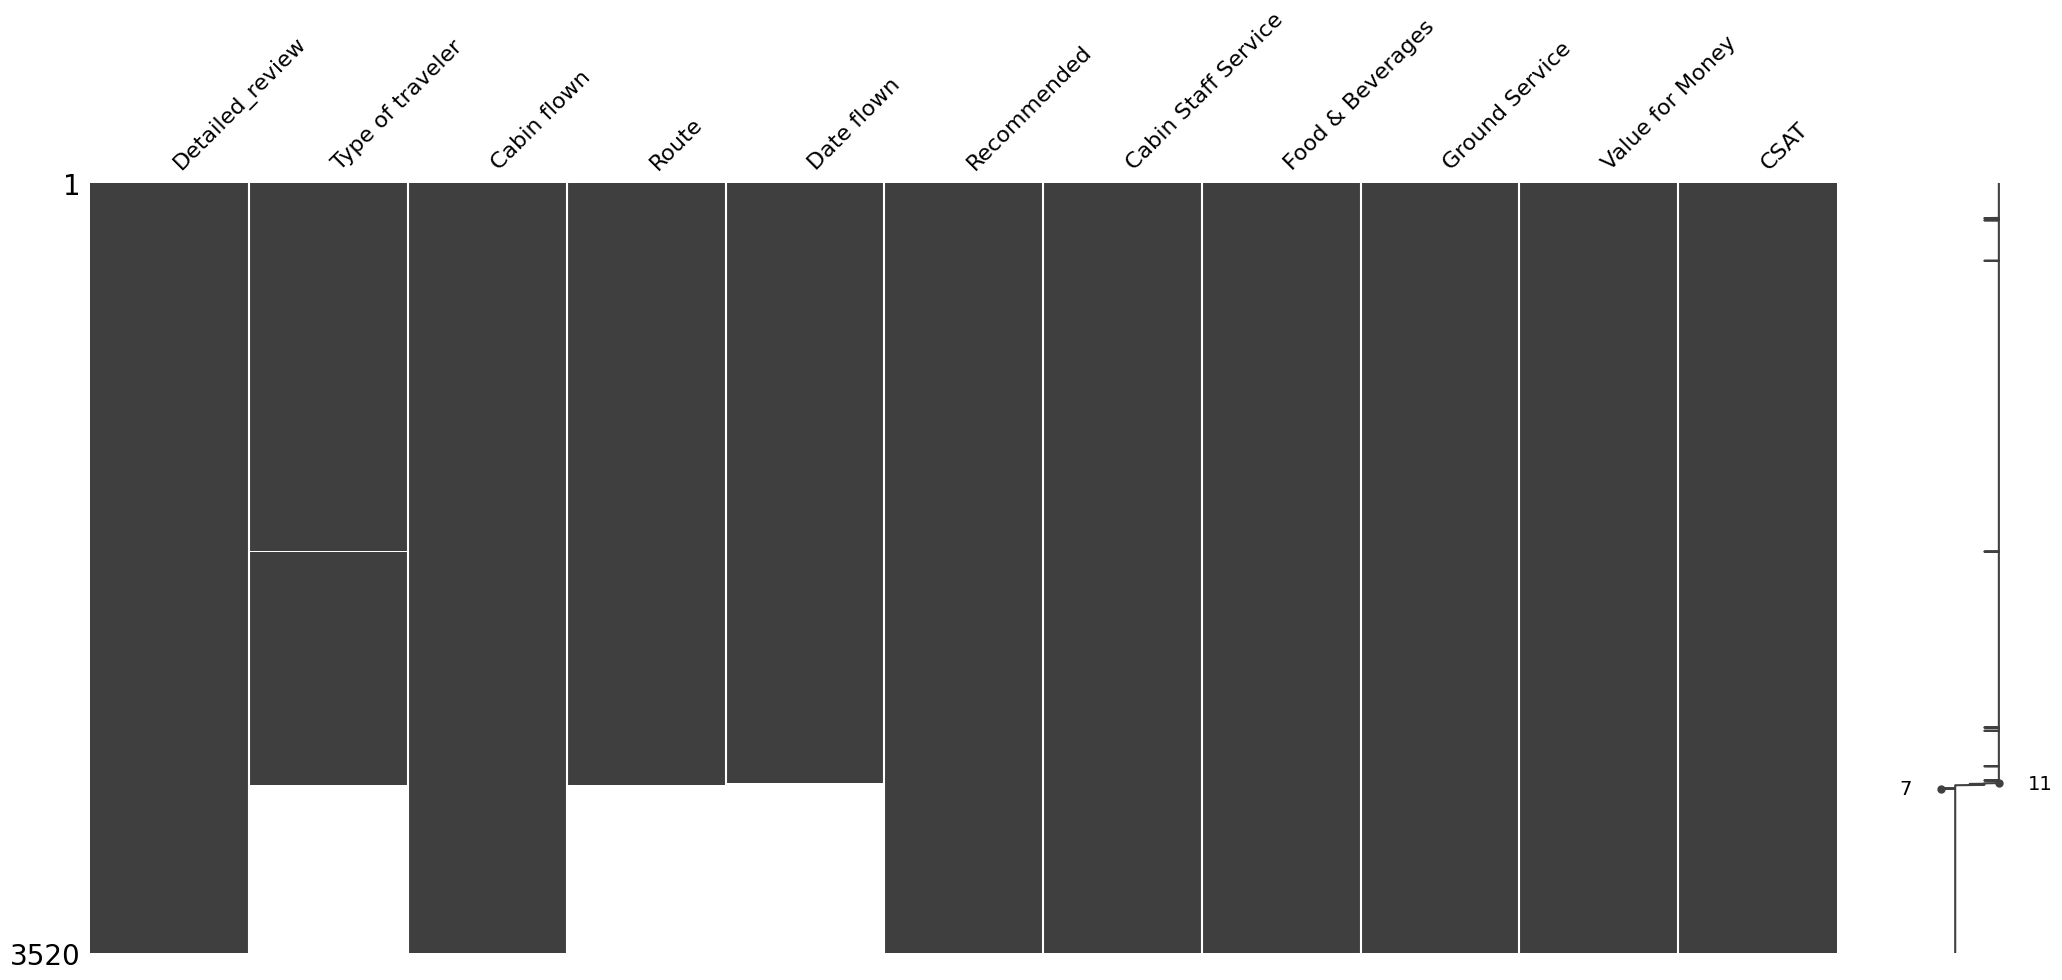

In [125]:
# plot the missing value matrix
msno.matrix(df)

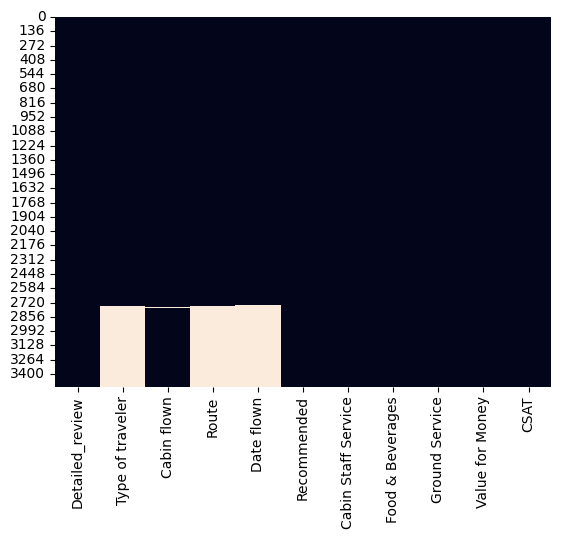

In [129]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [133]:
df1 = df.copy

In [146]:
df1 = df.dropna()

In [147]:
df1

,Detailed_review,Type_of_traveler,Cabin_flown,Route,Date_flown,Recommended,Cabin_Staff_Service,Food_Beverages,Ground_Service,Value_for_Money,CSAT
0,✅ Trip Verified | Why do you make it so hard? ...,Couple Leisure,Business Class,London to Atlanta,April 2023,no,3,2,2,3,2.50
1,✅ Trip Verified | After several delays and ca...,Couple Leisure,Economy Class,London to Copenhagen,April 2023,no,4,1,1,1,1.75
2,Not Verified | Literally the worst flight of ...,Couple Leisure,Economy Class,London to Malta,April 2023,no,1,2,1,1,1.25
3,✅ Trip Verified | I swore I would never fly B...,Couple Leisure,Economy Class,Belfast to London,April 2023,yes,4,3,4,4,3.75
4,✅ Trip Verified | Obviously many airlines hav...,Business,Premium Economy,London to Hong Kong,April 2023,no,2,3,4,3,3.00
...,...,...,...,...,...,...,...,...,...,...,...
2738,Terrible. Flight time is well over 2 hours. Se...,Business,Business Class,LHR to SOF,May 2015,no,3,2,3,1,2.25
2739,"28th May 2015, LHR-DEN, B747, Seat 29A. Paid ...",Solo Leisure,Economy Class,LHR-DEN,May 2015,yes,5,4,3,4,4.00
2740,"9/6/15, ORD-LHR, 777-300, Club World, Seat 13b...",Solo Leisure,Business Class,ORD-LHR,June 2015,yes,5,2,3,5,3.75
2741,"10/6/15, LHR-GLA, A321, Seat 9A. Was able to ...",Solo Leisure,Economy Class,LHR-GLA,June 2015,yes,5,3,3,4,3.75


       Cabin Staff Service  Food & Beverages  Ground Service  Value for Money  \
count          3520.000000       3520.000000     3520.000000      3520.000000   
mean              3.280682          2.729261        2.870170         2.733807   
std               1.482558          1.441182        1.285775         1.470132   
min               1.000000          0.000000        1.000000         0.000000   
25%               2.000000          1.000000        2.000000         1.000000   
50%               4.000000          3.000000        3.000000         3.000000   
75%               5.000000          4.000000        4.000000         4.000000   
max               5.000000          5.000000        5.000000         5.000000   

              CSAT  
count  3520.000000  
mean      2.903480  
std       1.166212  
min       1.000000  
25%       2.000000  
50%       2.750000  
75%       4.000000  
max       5.000000  


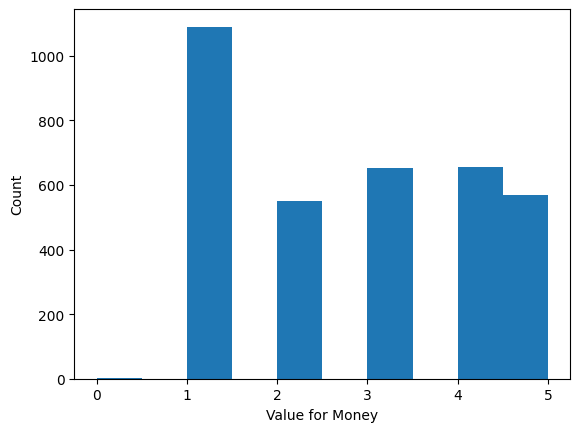

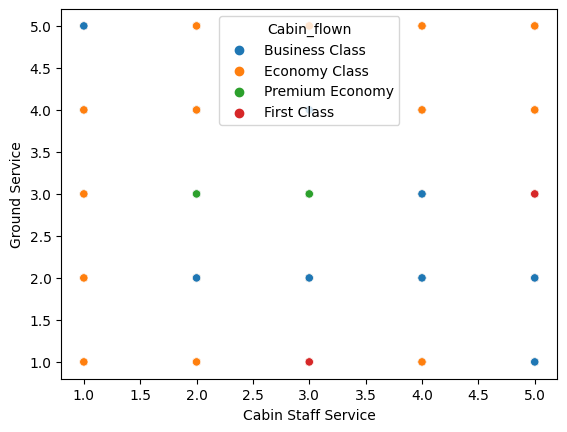

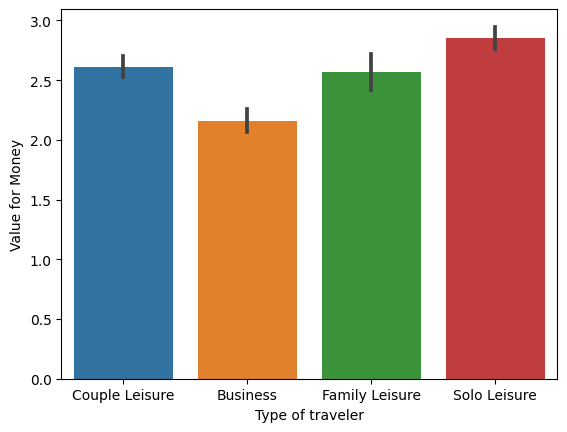

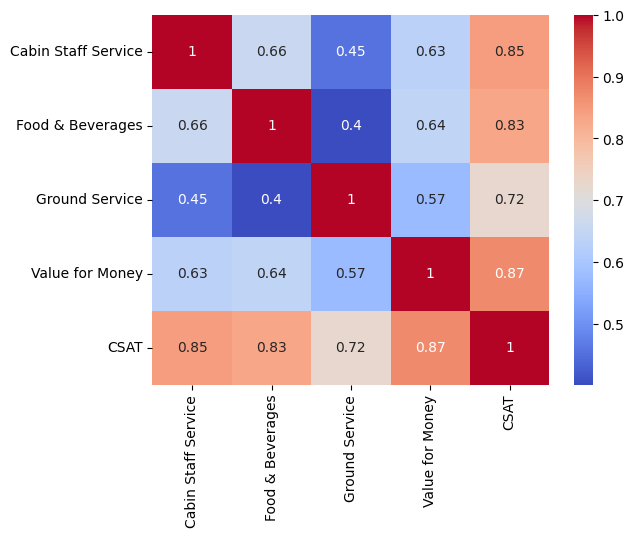

In [138]:



# Print some basic statistics about the numerical columns in the dataframe
print(df.describe())

# Create a histogram of the ratings data
plt.hist(df['Value for Money'], bins=10)
plt.xlabel('Value for Money')
plt.ylabel('Count')
plt.show()

# Create a scatter plot of the ratings for cabin staff service vs. ground service
sns.scatterplot(data=df, x='Cabin Staff Service', y='Ground Service', hue='Cabin_flown')
plt.show()

# Create a bar plot of the average rating for each type of traveler
sns.barplot(data=df, x='Type of traveler', y='Value for Money')
plt.show()

# Create a heatmap of the correlation matrix for the numerical columns in the dataframe
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [102]:
df['CSAT'] = (df['Cabin Staff Service'] + df['Food & Beverages'] + df['Ground Service'] + df['Value for Money']) / 4


In [104]:
df

,Detailed_review,Type of traveler,Cabin flown,Route,Date flown,Recommended,Cabin Staff Service,Food & Beverages,Ground Service,Value for Money,CSAT
0,✅ Trip Verified | Why do you make it so hard? ...,Couple Leisure,Business Class,London to Atlanta,April 2023,no,3,2,2,3,2.50
1,✅ Trip Verified | After several delays and ca...,Couple Leisure,Economy Class,London to Copenhagen,April 2023,no,4,1,1,1,1.75
2,Not Verified | Literally the worst flight of ...,Couple Leisure,Economy Class,London to Malta,April 2023,no,1,2,1,1,1.25
3,✅ Trip Verified | I swore I would never fly B...,Couple Leisure,Economy Class,Belfast to London,April 2023,yes,4,3,4,4,3.75
4,✅ Trip Verified | Obviously many airlines hav...,Business,Premium Economy,London to Hong Kong,April 2023,no,2,3,4,3,3.00
...,...,...,...,...,...,...,...,...,...,...,...
3515,YYZ to LHR - July 2012 - I flew overnight in p...,N/A,Premium Economy,N/A,N/A,yes,3,3,3,4,3.25
3516,LHR to HAM. Purser addresses all club passenge...,N/A,Business Class,N/A,N/A,yes,5,4,3,3,3.75
3517,My son who had worked for British Airways urge...,N/A,Economy Class,N/A,N/A,yes,5,4,3,4,4.00
3518,London City-New York JFK via Shannon on A318 b...,N/A,Premium Economy,N/A,N/A,no,3,5,3,1,3.00


In [111]:
# calculate the total CSAT score
total_csat = round(df['CSAT'].mean(), 2)

print('Total CSAT score:', total_csat)

Total CSAT score: 2.9


In [112]:
# calculate the overall CSAT percentage
overall_csat = round(df['CSAT'].mean() * 20, 2)

print(f"The overall CSAT percentage is: {overall_csat}%")

The overall CSAT percentage is: 58.07%


In [114]:
# calculate the NPS score
promoters = len(df[df['Recommended'] == 'yes'])
detractors = len(df[df['Recommended'] == 'no'])
total_responses = len(df)
nps_score = round((promoters - detractors) / total_responses * 100,2)

print("NPS score:", nps_score)

NPS score: -16.59


In [148]:
# create a map centered at London
map = folium.Map(location=[51.5074, -0.1278], zoom_start=3)

In [121]:
df.info

<bound method DataFrame.info of                                         Detailed_review Type of traveler  \
0     ✅ Trip Verified | Why do you make it so hard? ...   Couple Leisure   
1     ✅ Trip Verified |  After several delays and ca...   Couple Leisure   
2     Not Verified |  Literally the worst flight of ...   Couple Leisure   
3     ✅ Trip Verified |  I swore I would never fly B...   Couple Leisure   
4     ✅ Trip Verified |  Obviously many airlines hav...         Business   
...                                                 ...              ...   
3515  YYZ to LHR - July 2012 - I flew overnight in p...              N/A   
3516  LHR to HAM. Purser addresses all club passenge...              N/A   
3517  My son who had worked for British Airways urge...              N/A   
3518  London City-New York JFK via Shannon on A318 b...              N/A   
3519  SIN-LHR BA12 B747-436 First Class. Old aircraf...              N/A   

          Cabin flown                 Route  Date flown